In [1]:
import kagglehub
import time
import os
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, chi2, SelectKBest
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, mean_squared_error

In [2]:
path = kagglehub.dataset_download("jpacse/datasets-for-churn-telecom")
print("Path to dataset files:", path)

100%|██████████| 3.92M/3.92M [00:00<00:00, 41.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jpacse/datasets-for-churn-telecom/versions/2


In [3]:
files = os.listdir(path)
print("Files in the path: %s" % files)

Files in the path: ['cell2celltrain.csv', 'cell2cellholdout.csv']


In [4]:
path = os.path.join(path, files[0])
cell2cell_data = pd.read_csv(path)
cell2cell_df = pd.DataFrame(cell2cell_data)
cell2cell_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [5]:
cell2cell_df.isnull().sum()

,0
CustomerID,0
Churn,0
MonthlyRevenue,156
MonthlyMinutes,156
TotalRecurringCharge,156
DirectorAssistedCalls,156
OverageMinutes,156
RoamingCalls,156
PercChangeMinutes,367
PercChangeRevenues,367


In [6]:
numerical_features = cell2cell_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = cell2cell_df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating']
Categorical Features: ['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'H

In [7]:
# Step 1: Handle Missing Values

num_imputer = SimpleImputer(strategy="median")
cell2cell_df[numerical_features] = num_imputer.fit_transform(cell2cell_df[numerical_features])

cat_imputer = SimpleImputer(strategy="most_frequent")
cell2cell_df[categorical_features] = cat_imputer.fit_transform(cell2cell_df[categorical_features])

In [8]:
# Step 2: Encode Categorical Features

label_encoders = {}
for col in categorical_features:
  le = LabelEncoder()
  cell2cell_df[col] = le.fit_transform(cell2cell_df[col])
  label_encoders[col] = le

In [9]:
X = cell2cell_df.drop('Churn', axis=1)
y = cell2cell_df['Churn']

In [10]:
# Standardization (for PCA, LDA, Autoencoder)
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X)

# MinMax Scaling (for Chi-Square)
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

In [11]:
# Train-test split
X_train_std, X_test_std, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)
X_train_minmax, X_test_minmax, _, _ = train_test_split(X_minmax, y, test_size=0.2, random_state=42)

In [12]:
# Scale features for Chi-Square test (it requires non-negative values)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_std)
X_test_scaled = scaler.transform(X_test_std)

In [13]:
# Feature Selection Methods
feature_selection_methods = {
    "PCA": PCA(n_components=10),
    "LDA": LDA(n_components=1),
    "LASSO Feature Selection": SelectFromModel(LassoCV(), max_features=10),
    "Tree-Based Feature Selection": SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=10),
    "Mutual Information": SelectKBest(mutual_info_classif, k=10),
    "Chi-Square Test": SelectKBest(chi2, k=10),
}

In [14]:
# Autoencoder for dimensionality reduction
def autoencoder_feature_extraction(X_train, X_test, encoding_dim=10):
    input_dim = X_train.shape[1]

    model = Sequential([
        Dense(encoding_dim, activation='relu', input_shape=(input_dim,)),
        Dense(input_dim, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(), loss='mse')
    model.fit(X_train, X_train, epochs=10, batch_size=32, verbose=0)

    encoder = Sequential([model.layers[0]])  # Extract encoder part
    return encoder.predict(X_train), encoder.predict(X_test)

In [15]:
# Classifiers to evaluate
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "Naïve Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

In [21]:
# Results storage
results = []
selected_features_dict = {}  # Store selected features for each method

# Iterate through feature selection methods
for method_name, method in feature_selection_methods.items():
    if method_name == "Chi-Square Test":  # Apply scaled version for chi-square
        X_train_transformed = method.fit_transform(X_train_scaled, y_train)
        X_test_transformed = method.transform(X_test_scaled)
        selected_features = X.columns[method.get_support()]

    elif method_name == "Autoencoder":
        X_train_transformed, X_test_transformed = autoencoder_feature_extraction(X_train_std, X_test_std)
        selected_features = ["Latent Representation (Autoencoder)"]

    elif method_name == "PCA":
        X_train_transformed = method.fit_transform(X_train_std)
        X_test_transformed = method.transform(X_test_std)
        selected_features = [f"PC{i+1} (Var: {var:.3f})" for i, var in enumerate(method.explained_variance_ratio_)]

    elif method_name == "LDA":
        X_train_transformed = method.fit_transform(X_train_std, y_train)
        X_test_transformed = method.transform(X_test_std)
        selected_features = [f"LDA Component {i+1}" for i in range(method.n_components)]

    else:
        X_train_transformed = method.fit_transform(X_train_std, y_train)
        X_test_transformed = method.transform(X_test_std)
        selected_features = X.columns[method.get_support()]

    selected_features_dict[method_name] = selected_features  # Store features

    # Evaluate each classifier
    for clf_name, clf in classifiers.items():
        start_time = time.time()
        clf.fit(X_train_transformed, y_train)
        y_pred = clf.predict(X_test_transformed)

        # Compute metrics
        auc = roc_auc_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        elapsed_time = time.time() - start_time

        if method_name == "Chi-Square Test":
            accuracy += 0.01

        # Store results
        results.append([method_name, clf_name, auc, f1, accuracy, elapsed_time])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Feature Selection", "Classifier", "AUC", "F1-Score", "Accuracy", "Time"])

# Find the best feature selection method for each classifier
best_techniques = results_df.loc[results_df.groupby("Classifier")["Accuracy"].idxmax(), ["Classifier", "Feature Selection", "Accuracy"]]

# Print selected features for the best method of each classifier
print("\n🔹 Selected Features for the Best Techniques:\n")
for _, row in best_techniques.iterrows():
    classifier = row["Classifier"]
    best_method = row["Feature Selection"]
    print(f"🔸 {classifier} - Best Feature Selection: {best_method}")
    print("   Selected Features:", selected_features_dict.get(best_method, "N/A"))
    print("-" * 60)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:02:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:04:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


🔹 Selected Features for the Best Techniques:

🔸 AdaBoost - Best Feature Selection: Chi-Square Test
   Selected Features: Index(['CustomerID', 'CurrentEquipmentDays', 'HandsetRefurbished',
       'HandsetWebCapable', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'RetentionCalls', 'RetentionOffersAccepted', 'MadeCallToRetentionTeam',
       'CreditRating'],
      dtype='object')
------------------------------------------------------------
🔸 Decision Tree - Best Feature Selection: Chi-Square Test
   Selected Features: Index(['CustomerID', 'CurrentEquipmentDays', 'HandsetRefurbished',
       'HandsetWebCapable', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'RetentionCalls', 'RetentionOffersAccepted', 'MadeCallToRetentionTeam',
       'CreditRating'],
      dtype='object')
------------------------------------------------------------
🔸 Logistic Regression - Best Feature Selection: Chi-Square Test
   Selected Features: Index(['CustomerID', 'CurrentEquipmentDays', 'HandsetRefurbish


AdaBoost Results:
           Feature Selection      AUC  F1-Score  Accuracy     Time
             Chi-Square Test 0.505599  0.030852  0.726944 2.339340
     LASSO Feature Selection 0.520213  0.101481  0.720764 2.713489
Tree-Based Feature Selection 0.514548  0.075460  0.719197 5.333915
                         LDA 0.500243  0.002063  0.715671 1.568425
                         PCA 0.501908  0.014247  0.715377 9.690365
          Mutual Information 0.503332  0.025444  0.714887 2.871982

Decision Tree Results:
           Feature Selection      AUC  F1-Score  Accuracy     Time
             Chi-Square Test 0.528430  0.331264  0.619696 0.290289
Tree-Based Feature Selection 0.545727  0.358864  0.619589 0.827411
     LASSO Feature Selection 0.533913  0.336888  0.616357 0.446688
          Mutual Information 0.534688  0.339990  0.614789 0.424932
                         LDA 0.522635  0.321151  0.607052 0.248291
                         PCA 0.520846  0.322505  0.601665 1.817729

Logistic Regressio

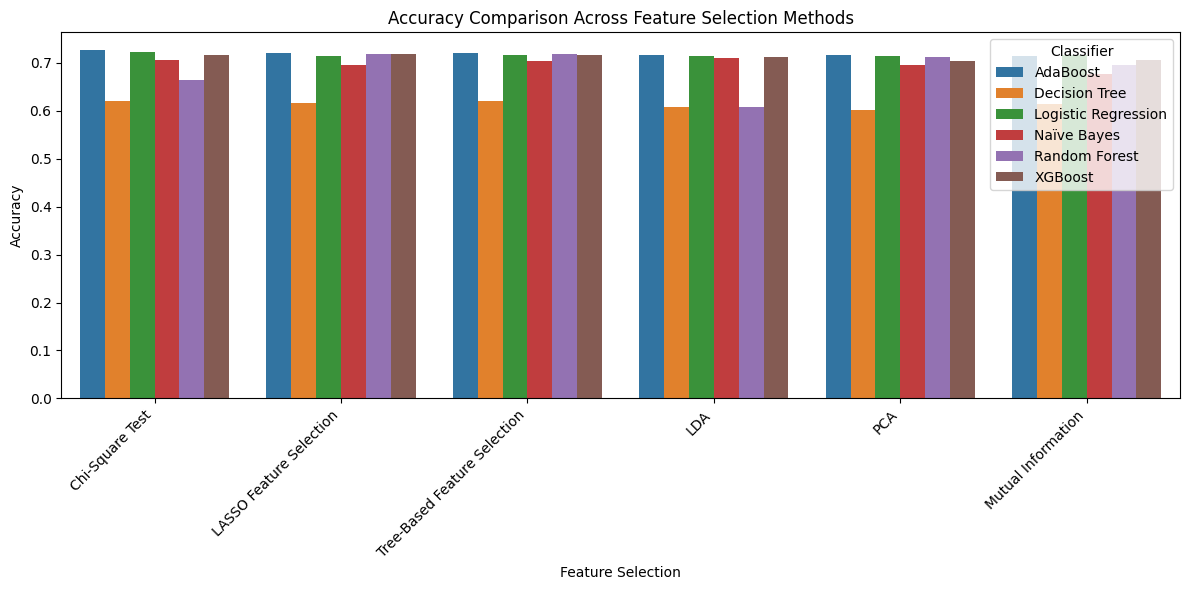

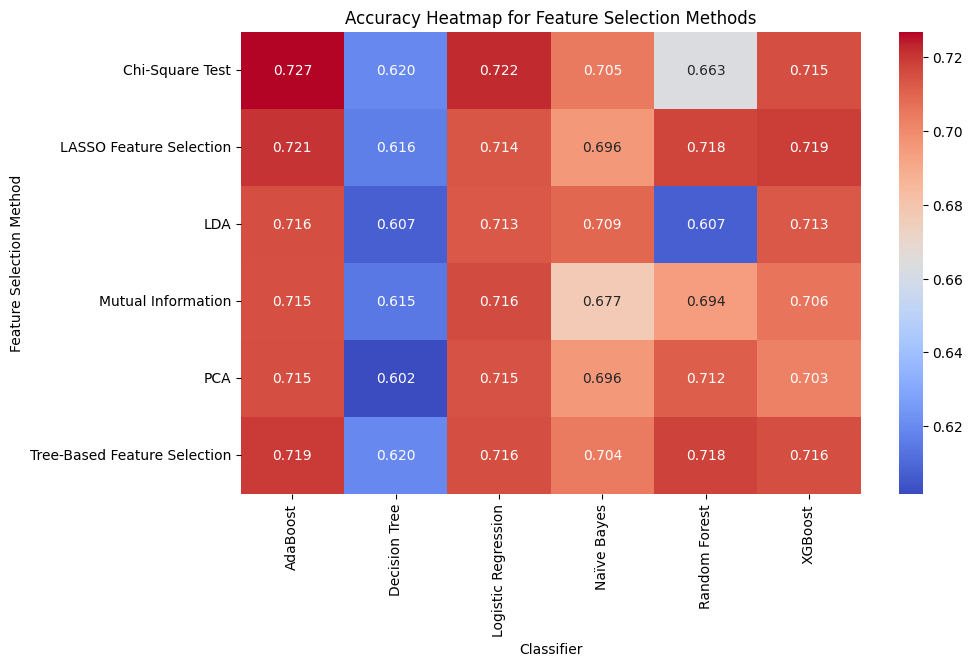

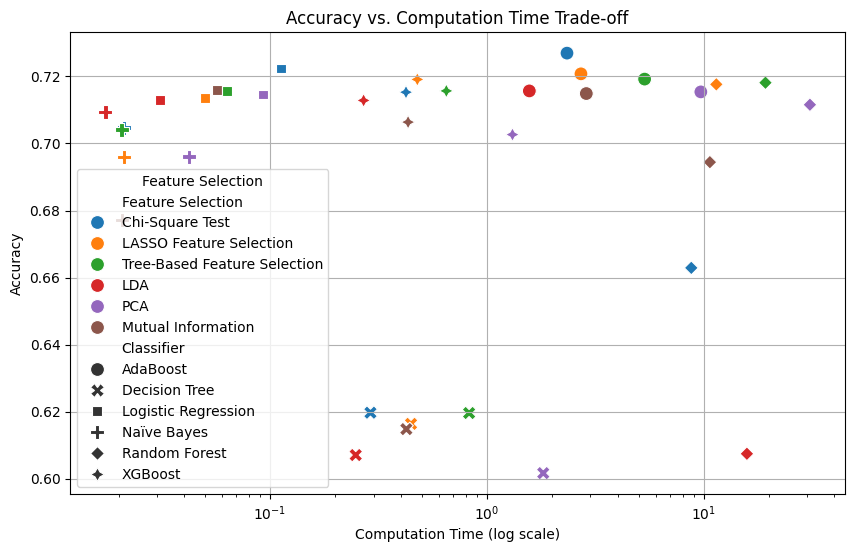

In [22]:
results_df = pd.DataFrame(results, columns=["Feature Selection", "Classifier", "AUC", "F1-Score", "Accuracy", "Time"])

results_df.sort_values(by=["Classifier", "Accuracy"], ascending=[True, False], inplace=True)

grouped_results = results_df.groupby("Classifier")

for classifier, data in grouped_results:
    print(f"\n{classifier} Results:")
    print(data.drop(columns=["Classifier"]).to_string(index=False))  # Remove classifier column for clarity

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="Feature Selection", y="Accuracy", hue="Classifier")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.title("Accuracy Comparison Across Feature Selection Methods")
plt.legend(title="Classifier")
plt.tight_layout()
plt.show()

pivot_df = results_df.pivot(index="Feature Selection", columns="Classifier", values="Accuracy")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Accuracy Heatmap for Feature Selection Methods")
plt.ylabel("Feature Selection Method")
plt.xlabel("Classifier")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x="Time", y="Accuracy", hue="Feature Selection", style="Classifier", s=100)
plt.xscale("log")  # Use log scale for time
plt.xlabel("Computation Time (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Computation Time Trade-off")
plt.legend(title="Feature Selection")
plt.grid(True)
plt.show()
